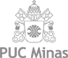
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 04_Interpretacao.ipynb

<B>Data:</B> 11/04/2022    
   
<a class="anchor" id="etapas"></a>
## Indice

1. [Interpretação Melhor Solução: K-Means](#arout)<br>
2. [Olist deve remover vendedores de baixo desempenho de seu mercado?](#limpa)<br>


In [44]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [45]:
%whos

Interactive namespace is empty.


In [46]:
#!pip install -U matplotlib --user
#Successfully installed matplotlib-3.5.1

In [47]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

In [48]:
#versão necessária 3.5.1
print(matplotlib.__version__)

3.5.1


## <a class="anchor" id="arout">1. Interpretação Melhor Solução</a>
[Retorna ao Indice](#etapas)

In [49]:
df_abt = pd.read_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_kmeans_cluster.xlsx',index_col=0)
#df_abt_kmeans = pd.read_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_sc_kmeans.xlsx', index_col=0)
df_abt_ms = pd.read_excel(caminho_temp+'03_03_Modelos_MeanShift_df_abt_sc_ms.xlsx', index_col=0)

In [50]:
df_abt.shape,df_abt_ms.shape

((1658, 115), (1658, 24))

In [51]:
df_abt_ms.select_dtypes(exclude=['int64','float64']).columns

Index(['vendedor_id', 'vendedor_cidade', 'vendedor_estado',
       'vendedor_grande_regiao_nome', 'plano', 'produto_categoria_nome_moda'],
      dtype='object')

In [52]:
df_abt_ms.columns

Index(['vendedor_id', 'vendedor_cidade', 'vendedor_estado',
       'vendedor_grande_regiao_nome', 'plano',
       'distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_nome_moda', 'produto_categoria_id_moda',
       'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido', 'cluster'],
      dtype='object')

In [53]:

df_abt_ms.select_dtypes(['int64','float64']).columns

Index(['distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_id_moda', 'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido', 'cluster'],
      dtype='object')

In [54]:
%%time
df_teste_kruskal=mf.teste_kruskal(df_abt_ms,
                                'distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
                                'Area(km2)_mediana', 'habit_km2_mediana',
                                'postagem_limiteparceiro_variacao_mediana',
                                'postagem_limiteparceiro_dias_atraso_mediana',
                                'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
                                'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
                                'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido')

Wall time: 590 ms


In [55]:
df_teste_kruskal[df_teste_kruskal['p']>0.05]

,med_0,std_0,med_1,std_1,med_2,std_2,med_3,std_3,med_4,std_4,med_5,std_5,med_6,std_6,med_7,std_7,t,p
Area(km2)_mediana,715.94,524.25,720.66,1872.43,713.96,806.91,684.11,354.01,690.57,589.97,692.82,250.64,707.11,209.14,794.57,1671.83,1.23,0.990199
vlr_medio_pedido,118.65,151.83,110.24,222.99,124.99,188.02,121.87,100.25,129.70,140.62,122.89,106.03,121.04,116.25,136.30,214.17,6.34,0.501182


In [56]:
#Recursos interessantes para a apresentação:

In [57]:
#H0=A mediana das features são iguais nos clusters.
#Ha=A mediana das features NÃO são iguais nos clusters.

In [58]:
df_teste_kruskal[~(df_teste_kruskal['p']>0.05)]

,med_0,std_0,med_1,std_1,med_2,std_2,med_3,std_3,med_4,std_4,med_5,std_5,med_6,std_6,med_7,std_7,t,p
distancia_cliente_vendedor_mediana,422.51,331.47,469.93,572.85,446.86,366.64,436.21,254.53,525.55,560.81,405.14,179.52,475.64,205.33,495.79,629.29,34.33,0.000015
produto_peso_g_mediana,712.00,4040.81,800.00,5615.99,850.00,4132.05,750.00,2489.50,500.00,2734.43,650.00,2699.50,1050.00,2596.00,1100.00,4367.02,19.32,0.007235
habit_km2_mediana,2011.56,2267.82,1403.95,2847.38,961.92,2056.06,917.79,1560.33,885.00,1661.56,1045.77,1207.61,933.72,882.01,1573.00,2437.79,65.54,0.000000
postagem_limiteparceiro_variacao_mediana,-4.00,2.06,-4.00,3.29,-4.00,3.87,-4.00,1.75,-4.00,1.89,-4.00,1.67,-4.00,1.68,1.00,12.35,95.03,0.000000
postagem_limiteparceiro_dias_atraso_mediana,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.10,793.42,0.000000
entrega_estimado_dias_atraso_mediana,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,21.03,1594.09,0.000000
"PIB_percapita_(3285,11000]",0.00,0.15,0.00,0.15,0.00,0.12,1.00,5.62,1.00,1.96,1.00,4.14,1.00,3.63,0.00,0.24,1103.48,0.000000
qtd_mes_01,0.00,0.00,0.00,0.64,0.00,0.06,2.00,4.87,0.00,0.00,0.00,0.77,0.00,0.00,0.00,0.28,1423.28,0.000000
qtd_mes_02,0.00,0.09,0.00,0.66,0.00,0.85,3.00,7.46,0.00,0.40,2.00,4.84,0.00,0.10,0.00,0.24,958.64,0.000000
qtd_mes_04,0.00,0.10,0.00,0.20,0.00,1.17,2.00,10.23,0.00,0.36,3.00,7.19,1.00,3.21,0.00,0.39,905.84,0.000000


In [59]:
"""
As features:
-Area(km2)_mediana
-vlr_medio_pedido
Como falha a Hipótese H0, estas features não são significativas para o modelo.
"""

'\nAs features:\n-Area(km2)_mediana\n-vlr_medio_pedido\nComo falha a Hipótese H0, estas features não são significativas para o modelo.\n'

In [60]:
df_abt_ms.var().sort_values(ascending=False)

produto_peso_g_mediana                         1.804318e+07
habit_km2_mediana                              5.066689e+06
Area(km2)_mediana                              1.147510e+06
lucro                                          1.065012e+06
distancia_cliente_vendedor_mediana             1.864502e+05
vlr_medio_pedido                               2.904588e+04
dias_entre_pedidos                             2.512773e+02
qtd_mes_12                                     1.124780e+02
produto_categoria_id_moda                      9.793161e+01
qtd_mes_06                                     4.208594e+01
entrega_estimado_dias_atraso_mediana           2.125638e+01
qtd_mes_04                                     2.057882e+01
postagem_limiteparceiro_variacao_mediana       1.838219e+01
qtd_mes_02                                     1.122941e+01
postagem_limiteparceiro_dias_atraso_mediana    7.469928e+00
PIB_percapita_(3285,11000]                     6.942888e+00
cluster                                 

In [61]:
features_todas=['distancia_cliente_vendedor_mediana', 'produto_categoria_id_moda', 'habit_km2_mediana',
                'postagem_limiteparceiro_variacao_mediana', 'postagem_limiteparceiro_dias_atraso_mediana',
                'entrega_estimado_dias_atraso_mediana','PIB_percapita_(3285,11000]','qtd_mes_01','qtd_mes_02',
                'qtd_mes_04','qtd_mes_06','qtd_mes_12','lucro','dias_entre_pedidos','produto_peso_g_mediana']

features_cluster=['cluster']
features_relevantes_moda=['produto_categoria_id_moda']
features_relevantes_mediana=['habit_km2_mediana','distancia_cliente_vendedor_mediana','entrega_estimado_dias_atraso_mediana',
            'produto_peso_g_mediana']
features_relevantes=['lucro','dias_entre_pedidos','qtd_mes_04','qtd_mes_06','qtd_mes_12']
features_moda=['produto_categoria_id_moda']
features_moda2=['vendedor_cidade', 'vendedor_estado','vendedor_grande_regiao_nome', 'plano', 'produto_categoria_nome_moda']
subcabecalho=['Lucro','Dias entre pedidos','Pedidos em Abril','Pedidos em Junho','Pedidos em Dezembro']
subcabecalho2=['Habitantes por km2','Distância entre cliente e vendedor','Dias de Atraso entre entrega e data estimada','Peso produto(g)']
subcabecalho3=['Cidade do Vendedor','Estado do Vendedor','Região do Vendedor','Plano da Olist','Categorias dos Produtos']
features_moda=['produto_categoria_id_moda']
  


count     393.000000
mean     -152.474122
std       245.592013
min     -1336.380000
25%      -250.770000
50%      -178.850000
75%      -108.820000
max      2248.800000
Name: lucro, dtype: float64

count     346.000000
mean      -95.271387
std       135.916135
min      -360.740000
25%      -129.812500
50%      -103.950000
75%       -92.205000
max      1958.580000
Name: lucro, dtype: float64

count     265.000000
mean      -56.600151
std       289.940324
min      -530.240000
25%      -182.560000
50%      -121.090000
75%       -28.790000
max      2835.290000
Name: lucro, dtype: float64

count      181.000000
mean       962.945193
std       2225.628443
min       -596.430000
25%       -159.740000
50%        224.930000
75%       1426.680000
max      19108.440000
Name: lucro, dtype: float64

count     138.000000
mean      -71.074058
std       433.405423
min      -552.660000
25%      -283.322500
50%      -166.540000
75%       -33.422500
max      2193.630000
Name: lucro, dtype: float64

count     109.000000
mean      549.335138
std       942.076266
min      -785.190000
25%      -190.230000
50%       281.680000
75%      1115.470000
max      4066.380000
Name: lucro, dtype: float64

count       99.000000
mean       905.530707
std       2076.768709
min       -524.040000
25%       -106.710000
50%        179.900000
75%       1104.870000
max      15396.170000
Name: lucro, dtype: float64

count     65.000000
mean    -127.559231
std       78.300261
min     -323.280000
25%     -156.170000
50%     -134.870000
75%     -103.640000
max      150.620000
Name: lucro, dtype: float64

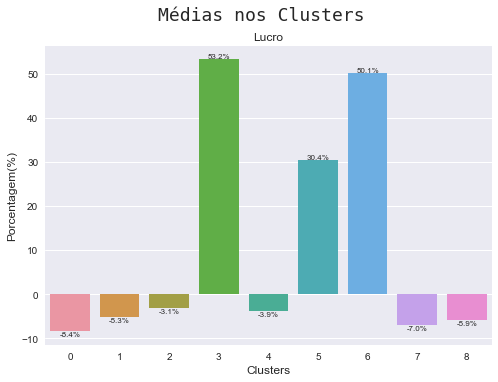

count    393.000000
mean      14.885496
std       13.596579
min        1.000000
25%        6.000000
50%       11.000000
75%       19.000000
max      106.000000
Name: dias_entre_pedidos, dtype: float64

count    346.000000
mean       2.153179
std        3.411354
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       34.000000
Name: dias_entre_pedidos, dtype: float64

count    265.000000
mean      28.505660
std       20.842687
min        2.000000
25%       13.000000
50%       21.000000
75%       37.000000
max      128.000000
Name: dias_entre_pedidos, dtype: float64

count    181.000000
mean      11.497238
std       12.465341
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       93.000000
Name: dias_entre_pedidos, dtype: float64

count    138.000000
mean      12.217391
std       11.645455
min        1.000000
25%        4.000000
50%        7.000000
75%       15.750000
max       63.000000
Name: dias_entre_pedidos, dtype: float64

count    109.000000
mean       9.834862
std        7.726234
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       44.000000
Name: dias_entre_pedidos, dtype: float64

count    99.000000
mean      7.898990
std       8.448518
min       1.000000
25%       3.000000
50%       5.000000
75%       9.500000
max      57.000000
Name: dias_entre_pedidos, dtype: float64

count    65.000000
mean     10.276923
std      20.159139
min       1.000000
25%       1.000000
50%       1.000000
75%       7.000000
max      98.000000
Name: dias_entre_pedidos, dtype: float64

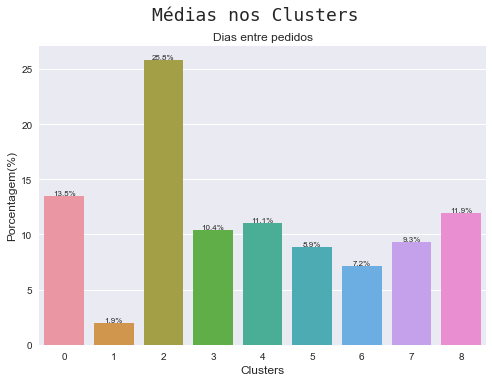

count    393.000000
mean       0.010178
std        0.100500
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: qtd_mes_04, dtype: float64

count    346.000000
mean       0.034682
std        0.198427
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: qtd_mes_04, dtype: float64

count    265.000000
mean       0.773585
std        1.174887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: qtd_mes_04, dtype: float64

count    181.000000
mean       6.077348
std       10.234179
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max       73.000000
Name: qtd_mes_04, dtype: float64

count    138.000000
mean       0.072464
std        0.355102
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: qtd_mes_04, dtype: float64

count    109.000000
mean       5.926606
std        7.188863
min        0.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       39.000000
Name: qtd_mes_04, dtype: float64

count    99.000000
mean      2.414141
std       3.210347
min       0.000000
25%       0.000000
50%       1.000000
75%       4.000000
max      18.000000
Name: qtd_mes_04, dtype: float64

count    65.000000
mean      0.138462
std       0.390389
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: qtd_mes_04, dtype: float64

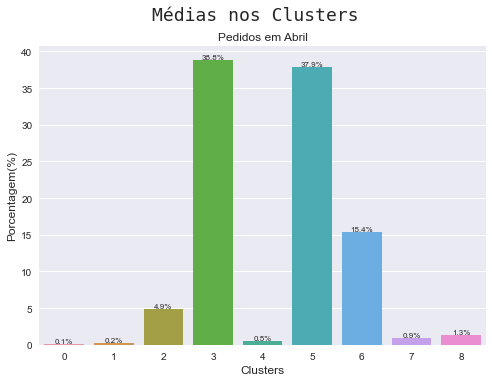

count    393.000000
mean       0.129771
std        0.842708
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       13.000000
Name: qtd_mes_06, dtype: float64

count    346.000000
mean       0.037572
std        0.190435
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: qtd_mes_06, dtype: float64

count    265.000000
mean       1.030189
std        1.618733
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       13.000000
Name: qtd_mes_06, dtype: float64

count    181.000000
mean       7.204420
std       14.249257
min        0.000000
25%        0.000000
50%        3.000000
75%        8.000000
max       99.000000
Name: qtd_mes_06, dtype: float64

count    138.000000
mean       0.202899
std        0.685187
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: qtd_mes_06, dtype: float64

count    109.000000
mean       6.431193
std        9.877366
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       58.000000
Name: qtd_mes_06, dtype: float64

count    99.000000
mean      6.989899
std       9.173492
min       0.000000
25%       2.000000
50%       4.000000
75%       9.000000
max      61.000000
Name: qtd_mes_06, dtype: float64

count    65.000000
mean      0.138462
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       3.000000
Name: qtd_mes_06, dtype: float64

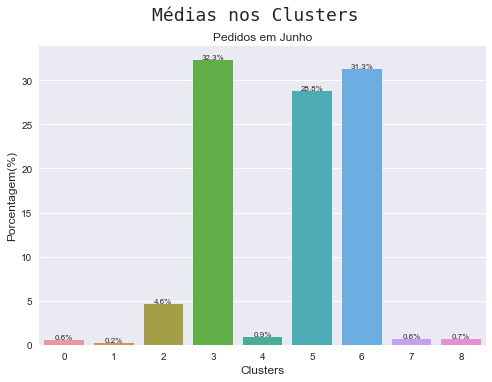

count    393.000000
mean       3.101781
std        5.779081
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       86.000000
Name: qtd_mes_12, dtype: float64

count    346.000000
mean       0.190751
std        0.485770
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: qtd_mes_12, dtype: float64

count    265.000000
mean       0.524528
std        1.059035
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: qtd_mes_12, dtype: float64

count    181.000000
mean       6.447514
std       17.009271
min        0.000000
25%        0.000000
50%        1.000000
75%        7.000000
max      174.000000
Name: qtd_mes_12, dtype: float64

count    138.000000
mean       6.572464
std       14.511454
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max      134.000000
Name: qtd_mes_12, dtype: float64

count    109.000000
mean       7.724771
std       18.290289
min        0.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      129.000000
Name: qtd_mes_12, dtype: float64

count     99.000000
mean      10.050505
std       19.923514
min        0.000000
25%        1.000000
50%        3.000000
75%       11.000000
max      129.000000
Name: qtd_mes_12, dtype: float64

count    65.000000
mean      0.184615
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: qtd_mes_12, dtype: float64

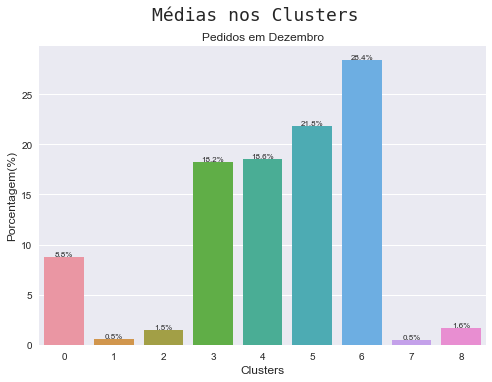

In [66]:
features=features_relevantes+features_cluster
describe_clusters = df_abt_ms[features].groupby('cluster').mean()
describe_clusters_2= round(describe_clusters/describe_clusters.sum()*100,2).reset_index()
l=0
for i in features_relevantes:
    sumario = {}

    for index in range(8):
        sumario[index] = df_abt_ms[df_abt_ms['cluster'] == index][i].describe().T  
    display(sumario[0],sumario[1],sumario[2],sumario[3],sumario[4],sumario[5],sumario[6],sumario[7])
    ax=sns.barplot(x = describe_clusters_2.index, y = i,  data = describe_clusters_2)  
    ax.set_xlabel('Clusters', fontsize = 12)
    ax.set_ylabel("Porcentagem(%)", fontsize = 12)

    plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%')   
    plt.title(subcabecalho[l])
    l+=1
    plt.suptitle('Médias nos Clusters', fontsize = 18, fontname = 'monospace')
    plt.show()


count     393.000000
mean     2693.720483
std      2267.823654
min        41.720000
25%       796.740000
50%      2011.560000
75%      4227.730000
max      8343.070000
Name: habit_km2_mediana, dtype: float64

count      346.000000
mean      2639.629928
std       2847.376865
min          0.790000
25%        223.752500
50%       1403.950000
75%       4386.670000
max      10744.310000
Name: habit_km2_mediana, dtype: float64

count     265.000000
mean     1889.105491
std      2056.062910
min        14.905000
25%       408.885000
50%       961.925000
75%      2919.280000
max      7959.270000
Name: habit_km2_mediana, dtype: float64

count     181.000000
mean     1506.135028
std      1560.325482
min        35.420000
25%       525.860000
50%       917.790000
75%      1883.050000
max      8151.170000
Name: habit_km2_mediana, dtype: float64

count     138.000000
mean     1487.483406
std      1661.558545
min        15.775000
25%       409.146250
50%       885.005000
75%      1867.833750
max      7959.270000
Name: habit_km2_mediana, dtype: float64

count     109.000000
mean     1414.176927
std      1207.611748
min       150.740000
25%       598.160000
50%      1045.770000
75%      1488.140000
max      5432.750000
Name: habit_km2_mediana, dtype: float64

count      99.000000
mean     1192.883232
std       882.014408
min        43.865000
25%       525.860000
50%       933.720000
75%      1582.112500
max      4227.730000
Name: habit_km2_mediana, dtype: float64

count      65.000000
mean     2561.295385
std      2437.790387
min         1.210000
25%       512.450000
50%      1573.000000
75%      4263.730000
max      7959.270000
Name: habit_km2_mediana, dtype: float64

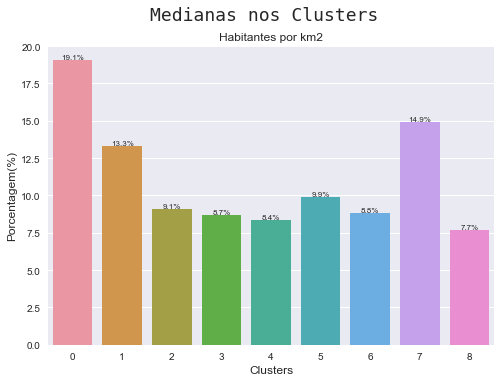

count     393.000000
mean      474.228785
std       331.471513
min         2.396000
25%       287.203000
50%       422.510000
75%       598.834000
max      2976.892000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     346.000000
mean      615.795798
std       572.852302
min         1.057000
25%       244.899750
50%       469.932500
75%       767.042750
max      3016.675000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     265.000000
mean      532.062104
std       366.636583
min        13.986500
25%       312.883000
50%       446.865000
75%       705.609500
max      2400.492000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     181.000000
mean      498.260586
std       254.533760
min        63.628000
25%       347.690000
50%       436.214000
75%       569.859000
max      1567.722000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     138.000000
mean      742.878902
std       560.809874
min        36.583000
25%       379.646375
50%       525.550000
75%       901.673000
max      2838.216000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count    109.000000
mean     441.977725
std      179.517157
min       34.174000
25%      347.957000
50%      405.144500
75%      532.417000
max      947.094000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count      99.000000
mean      509.985449
std       205.328161
min       128.980000
25%       368.111500
50%       475.641000
75%       606.252500
max      1226.125000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count      65.000000
mean      730.945215
std       629.292343
min        30.938000
25%       334.417000
50%       495.790000
75%       910.142000
max      2774.847000
Name: distancia_cliente_vendedor_mediana, dtype: float64

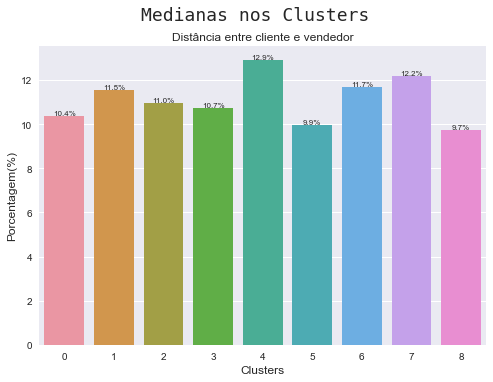

count    393.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    346.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    265.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    181.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    138.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    109.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    99.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count     65.000000
mean      10.523077
std       21.030564
min        1.000000
25%        3.000000
50%        6.000000
75%       12.000000
max      167.000000
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

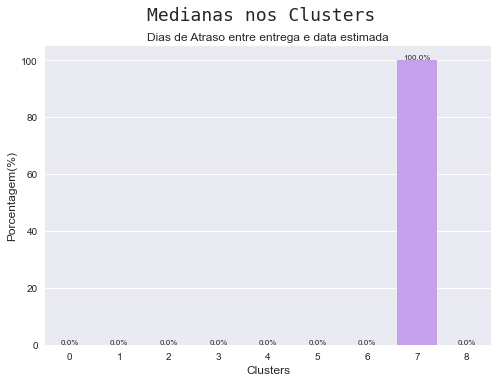

count      393.000000
mean      2222.938931
std       4040.812812
min         50.000000
25%        390.000000
50%        712.000000
75%       1720.000000
max      30000.000000
Name: produto_peso_g_mediana, dtype: float64

count      346.000000
mean      2985.645954
std       5615.994676
min         98.000000
25%        400.000000
50%        800.000000
75%       2637.500000
max      30000.000000
Name: produto_peso_g_mediana, dtype: float64

count      265.000000
mean      2436.471698
std       4132.051354
min        100.000000
25%        400.000000
50%        850.000000
75%       2250.000000
max      30000.000000
Name: produto_peso_g_mediana, dtype: float64

count      181.000000
mean      1672.483425
std       2489.495814
min         50.000000
25%        400.000000
50%        750.000000
75%       1600.000000
max      16100.000000
Name: produto_peso_g_mediana, dtype: float64

count      138.000000
mean      1595.938406
std       2734.428102
min         50.000000
25%        300.000000
50%        500.000000
75%       1400.000000
max      20700.000000
Name: produto_peso_g_mediana, dtype: float64

count      109.00000
mean      1647.87156
std       2699.50086
min        100.00000
25%        300.00000
50%        650.00000
75%       1700.00000
max      17600.00000
Name: produto_peso_g_mediana, dtype: float64

count       99.000000
mean      1998.974747
std       2596.001345
min        138.000000
25%        459.500000
50%       1050.000000
75%       1900.000000
max      15350.000000
Name: produto_peso_g_mediana, dtype: float64

count       65.000000
mean      2776.500000
std       4367.024915
min        175.000000
25%        400.000000
50%       1100.000000
75%       2900.000000
max      21400.000000
Name: produto_peso_g_mediana, dtype: float64

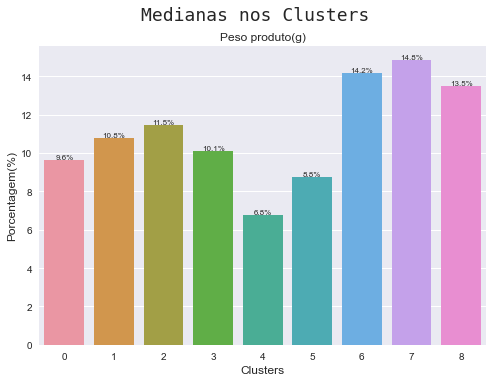

In [67]:
features=features_relevantes_mediana+features_cluster
describe_clusters = df_abt_ms[features].groupby('cluster').median()
describe_clusters_2= round(describe_clusters/describe_clusters.sum()*100,2).reset_index()
l=0
for i in features_relevantes_mediana:
    sumario = {}

    for index in range(8):
        sumario[index] = df_abt_ms[df_abt_ms['cluster'] == index][i].describe().T  
    display(sumario[0],sumario[1],sumario[2],sumario[3],sumario[4],sumario[5],sumario[6],sumario[7])
 
    ax=sns.barplot(x = describe_clusters_2.index, y = i,  data = describe_clusters_2)
    ax.set_xlabel('Clusters', fontsize = 12)
    ax.set_ylabel("Porcentagem(%)", fontsize = 12)

    plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%') 
    plt.title(subcabecalho2[l])
    l+=1
    plt.suptitle('Medianas nos Clusters', fontsize = 18, fontname = 'monospace')
    plt.show()


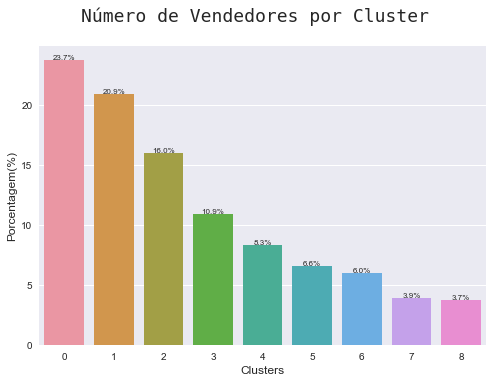

In [68]:
#Numero de vendedores por clusters
df_vend=round(df_abt_ms['cluster'].value_counts(normalize=True)*100,2)
df_vend=df_vend.reset_index()
ax=sns.barplot(x = df_vend.index, y = 'cluster',  data = df_vend)  
ax.set_xlabel('Clusters', fontsize = 12)
ax.set_ylabel("Porcentagem(%)", fontsize = 12)

plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%')   
plt.suptitle('Número de Vendedores por Cluster', fontsize = 18, fontname = 'monospace')

plt.show()


## <a class="anchor" id="limpa">2. Olist deve remover vendedores de baixo desempenho de seu mercado?</a>
[Retorna ao Indice](#etapas)

In [71]:
df_abt[['vendedor_id','lucro']][df_abt['lucro']>0].sort_values(by='lucro',ascending=False).head(100)

,vendedor_id,lucro
837,7e93a43ef30c4f03f38b393420bc753a,19108.44
548,53243585a1d6dc2643021fd1853d8905,15396.17
1619,fa1c13f2614d7b5c4749cbc52fecda94,12409.17
467,46dc3b2cc0980fb8ec44634e21d2718e,11007.82
476,4869f7a5dfa277a7dca6462dcf3b52b2,9538.71
811,7a67c85e85bb2ce8582c35f2203ad736,7382.95
640,620c87c171fb2a6dd6e8bb4dec959fc6,7088.82
1344,ccc4bbb5f32a6ab2b7066a4130f114e3,5517.09
609,5c243662ce92d84573bfaff24c3e3700,5162.72
371,37be5a7c751166fbc5f8ccba4119e043,5046.40


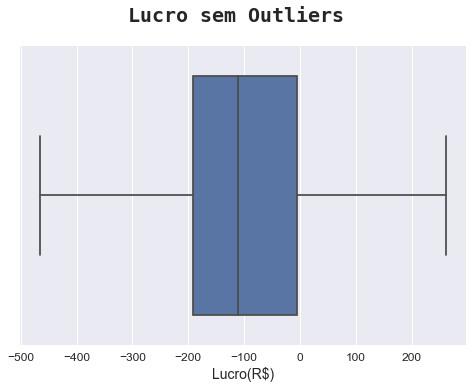

In [72]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt,showfliers=False)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.suptitle("Lucro sem Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

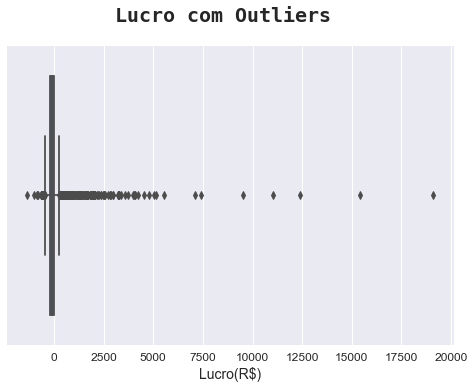

In [73]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt,showfliers=True)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.suptitle("Lucro com Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

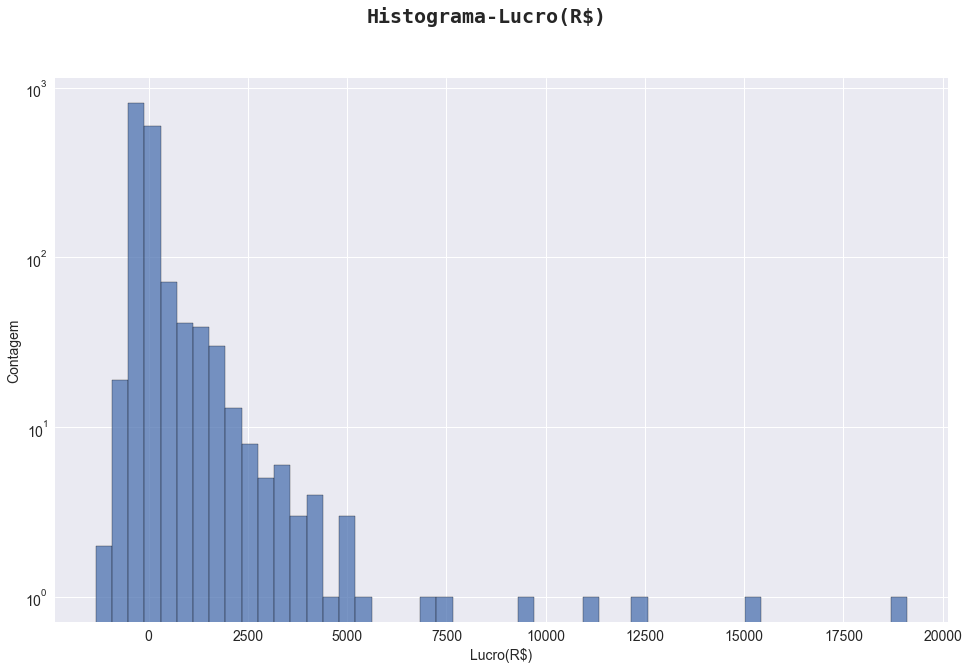

In [74]:
#lucro
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(df_abt["lucro"], bins=50, log_scale=(False, True), ax=ax)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.ylabel('Contagem',fontsize=14)

plt.suptitle("Histograma-Lucro(R$)", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()
#sns.histplot(df_abt["lucro"], bins=50, ax=ax)

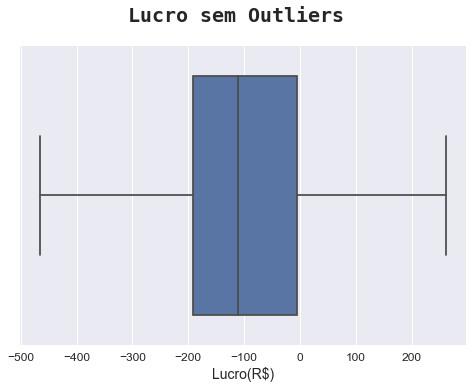

In [75]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt,showfliers=False)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.suptitle("Lucro sem Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

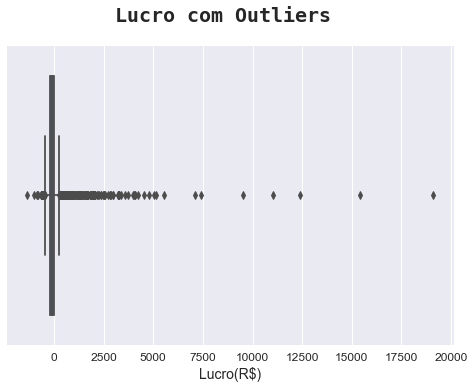

In [76]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt)
plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.suptitle("Lucro com Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

In [77]:
#Encontrou os vendedores menos lucrativos com base em avaliações negativas
df_abt[['receitas', 'custo_reviews', 'lucro']].sort_values(by='lucro', ignore_index= True).head(15)

,receitas,custo_reviews,lucro
0,1711.81,1370,-1336.38
1,1542.43,1075,-1002.32
2,932.76,440,-859.45
3,1714.90,1060,-845.02
4,8898.70,1635,-785.19
5,2645.39,840,-652.05
6,17422.93,5630,-642.44
7,656.74,240,-625.11
8,638.53,435,-596.86
9,741.84,230,-596.43


In [78]:
print(f"Número: - vendedores:  {df_abt['vendedor_id'].nunique()}")
print(f"        - pedidos:    {df_abt['qtd_pedidos'].sum()} ")
print(f"Lucro atual:   R$ {round(df_abt['lucro'].sum(), 2)}")

Número: - vendedores:  1658
        - pedidos:    42742 
Lucro atual:   R$ 191221.51


In [79]:
#contar os vendedores a remover
vendedores_removidos = []
#salve o lucro total depois de remover os vendedores
lista_lucro = []

df = df_abt.sort_values(by='lucro', ignore_index= True).copy(deep=True)

for i in range(len(df)):
    lista_lucro.append(mf.calcula_lucro_total(df[i:]) / 1000)
    vendedores_removidos.append(i)


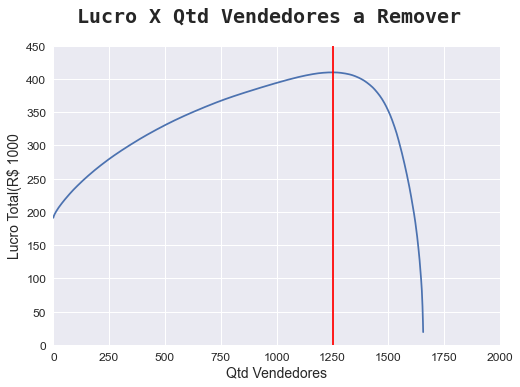

In [80]:
#Como o lucro muda quando deixamos de lado os vendedores menos lucrativos?
sns.lineplot(x = vendedores_removidos, y = lista_lucro)
plt.axvline(1252, 0, 1, color= 'red')
plt.xlabel("Qtd Vendedores",fontsize=14)
plt.ylabel('Lucro Total(R$ 1000',fontsize=14)
plt.xlim(0,2000)
plt.ylim(0,450)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.suptitle("Lucro X Qtd Vendedores a Remover", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

In [81]:
lucro_maximo = max(lista_lucro)
vendedores_cortados = lista_lucro.index(lucro_maximo)
lucro_maximo, vendedores_cortados

(410.02799, 1252)

In [82]:
#Número ideal de vendedores ruins para remover
novo_lucro = []
novo_adm_custos = []
novo_custo_reviews = []
nova_receita = []

nb_sellers_to_remove = 2000
for i in range(nb_sellers_to_remove):
    X = df_abt.sort_values(by="lucro", ascending=True).iloc[i:, :].copy()
    novo_lucro.append(X['lucro'].sum())
    novo_adm_custos.append(X['adm_custos'].sum())
    novo_custo_reviews.append(X['custo_reviews'].sum())
    nova_receita.append(X['receitas'].sum())
#np.argmax(novo_lucro),np.max(novo_lucro)

<function matplotlib.pyplot.show(close=None, block=None)>

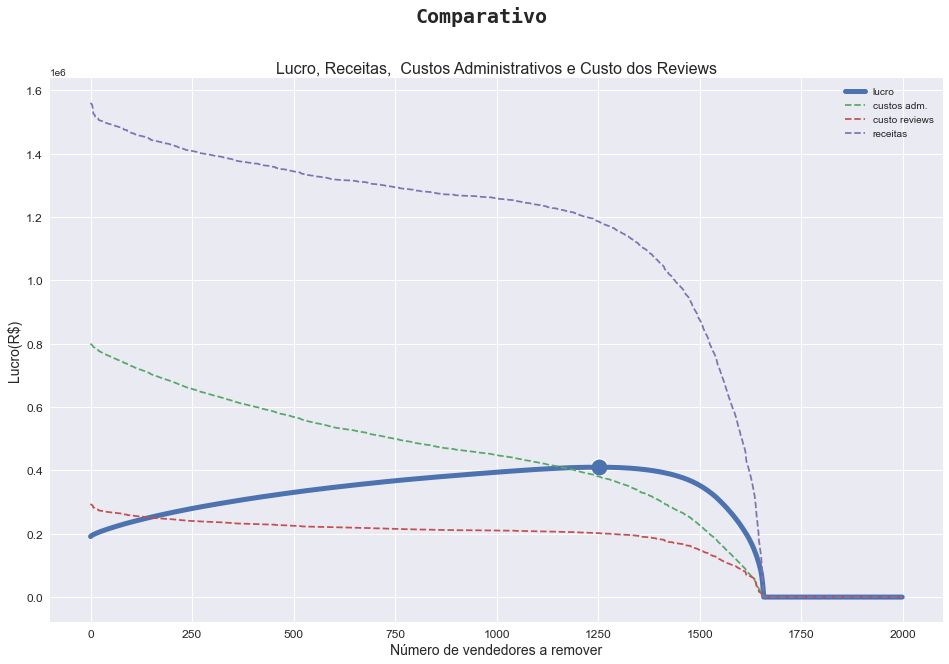

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_lucro, ax=ax, label="lucro", linewidth=5)
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_adm_custos, ax=ax, label="custos adm.", linestyle="--")
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_custo_reviews, ax=ax, label="custo reviews", linestyle="--")
sns.lineplot(x=range(nb_sellers_to_remove), y=nova_receita, ax=ax, label="receitas", linestyle="--")

sns.scatterplot(x=[np.argmax(novo_lucro)], y=[np.max(novo_lucro)], ax=ax, s=300)
# ax.axvline([np.argmax(new_profit)],color="black",linestyle="--")
ax.set_title("Lucro, Receitas,  Custos Administrativos e Custo dos Reviews", size=16)
ax.set_xlabel("Número de vendedores a remover",fontsize=14)
ax.set_ylabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.suptitle("Comparativo", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show

In [84]:
#Ao remover vendedores, reduzimos os custos relacionados ao usuário enquanto perdemos o volume de pedidos e, 
#portanto, aumentamos os custos administrativos.

In [85]:
print('-----Redução do número de vendedores')
print(f"Número: - vendedores:        {df['vendedor_id'][1252:].count()}")
print(f"        - pedidos:         {df['qtd_pedidos'][1252:].sum()} ")
print(f"Lucro neste caso:   R$ {np.max(novo_lucro)}")
print(f"Ganho:                      {int(np.round((np.max(novo_lucro) - novo_lucro[0]) / novo_lucro[0] * 100))}%")

-----Redução do número de vendedores
Número: - vendedores:        406
        - pedidos:         30649 
Lucro neste caso:   R$ 410027.99
Ganho:                      114%


<function matplotlib.pyplot.show(close=None, block=None)>

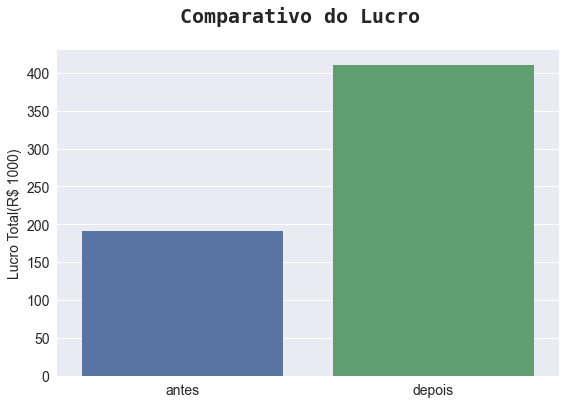

In [87]:
df= pd.DataFrame.from_dict({'antes': [191.22] , 'depois': [410.03]})
plt.figure(figsize=(9,6))
sns.barplot(data=df)
#plt.xlabel("Qtd Vendedores",fontsize=14)
plt.ylabel('Lucro Total(R$ 1000)',fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.suptitle("Comparativo do Lucro", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show

In [88]:
df_abt_vend=df_abt.copy(deep=True)

In [89]:
#Detecção dos maus vendedores
df_abt_vend["tipo_vendedor"] = "Bom"
df_abt_vend.sort_values(by="lucro", ascending=True, inplace=True)
df_abt_vend.loc[df_abt_vend.index[:np.argmax(novo_lucro)], "tipo_vendedor"] = "Mau"

<function matplotlib.pyplot.show(close=None, block=None)>

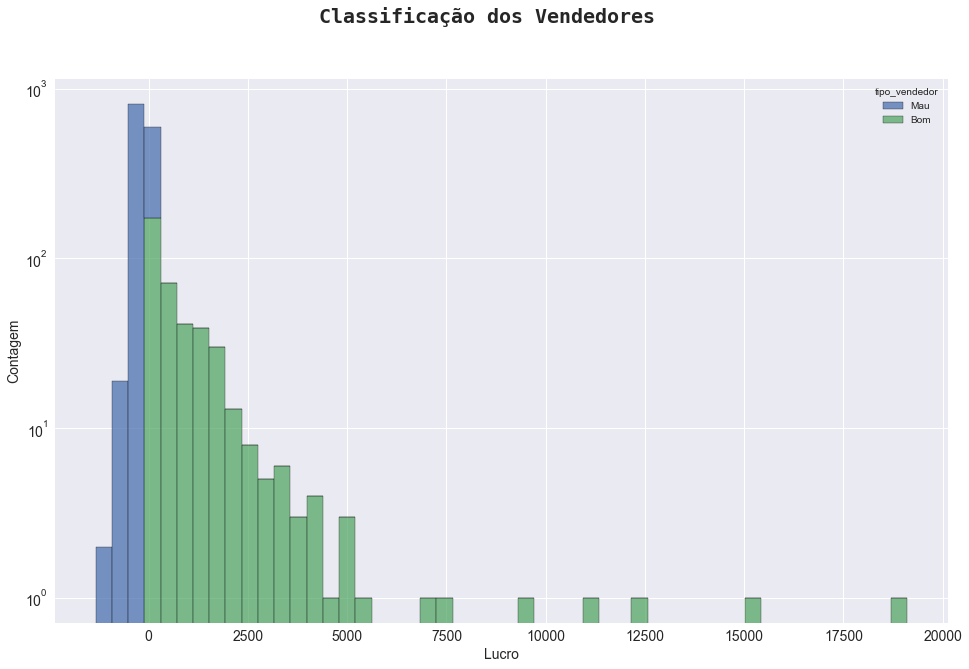

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(x='lucro', data=df_abt_vend, bins=50, hue="tipo_vendedor", log_scale=(False, True), ax=ax, multiple="stack")
plt.ylabel('Contagem',fontsize=14)
plt.xlabel('Lucro',fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.suptitle("Classificação dos Vendedores", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show